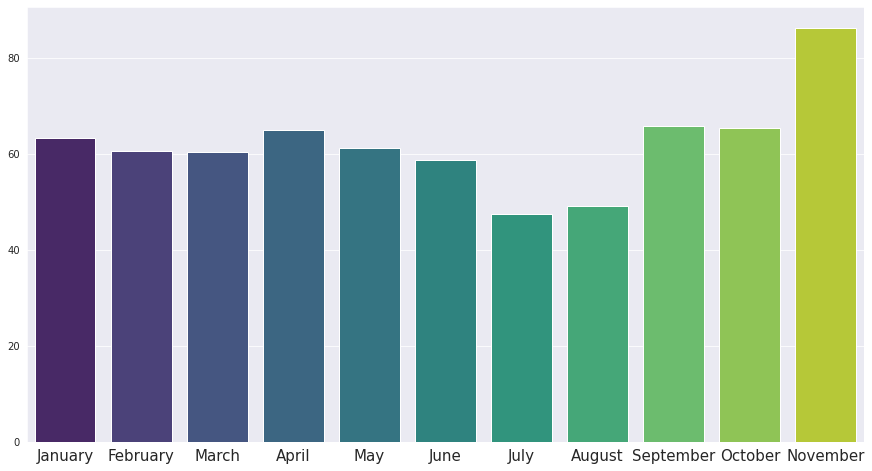

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df1 = pd.read_csv('/home/left/Desktop/dataMining/set1/multiTimeline2020.csv')

df1['Week'] = pd.to_datetime(df1['Εβδομάδα'])
df1['month'] = df1['Week'].dt.month
df1 = df1.drop(columns = 'Εβδομάδα')

mean_score = []
mean_books = []

for j in range(1,12):
    for i in range(len(df1.month)):
        if df1.month.values[i]==j:
            mean_score.append(df1.Score.values[i])
    mean_books.append(np.mean(mean_score))
    mean_score = []


months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,8))
g = sns.barplot(data = df1, x = months, y = mean_books, order = months, palette = 'viridis')
g.set_xticklabels(months, fontsize=15);



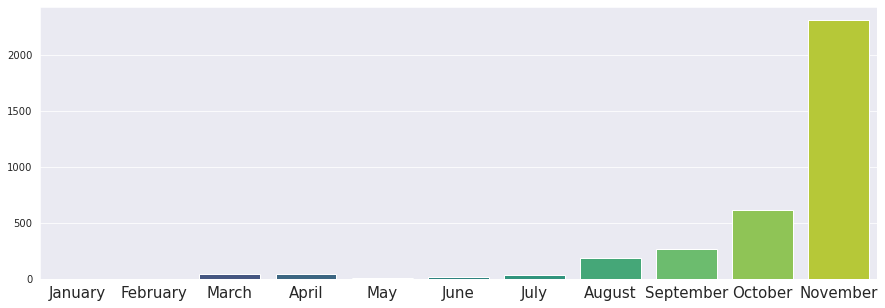

In [275]:
fields = ['iso_code','location','date','new_cases']

# Add also death_rate column
df = pd.read_csv('/home/left/Desktop/dataMining/set1/owid-covid-data.csv', usecols = fields)
df = df.loc[df.location == 'Greece']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

df['month'] = pd.to_datetime(df['date'])
df['month'] = df['month'].dt.month

mean_cases = []
mean_greece = []
for j in range(1,12):
    for i in range(len(df.month)):
        if df.month.values[i]==j:
            mean_cases.append(df.new_cases.values[i])
    mean_greece.append(np.nanmean(mean_cases))
    mean_cases = []

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))
s = sns.barplot(data = df, x = months, y = mean_greece, palette = 'viridis')
s.set_title('')
s.set_xticklabels(months, fontsize=15);

In [278]:
cross_df = pd.DataFrame({"mean_scores": mean_books, "mean_cases":mean_greece})

cross_df.index+=1
months = np.array([])

for x in cross_df.index:
    datetime_object = datetime.strptime(str(x), "%m")
    full_month_name = datetime_object.strftime("%B")
    months = np.append(months,full_month_name)
cross_df = cross_df.set_index(months)
cross_df.index.name = 'month'

In [279]:
cross_df

,mean_scores,mean_cases
month,,
January,63.25,0.000000
February,60.50,0.137931
March,60.40,41.655172
April,65.00,45.466667
May,61.20,10.935484
June,58.75,15.833333
July,47.50,32.612903
August,49.20,184.935484
September,65.75,266.300000


In [303]:
from scipy.stats import ttest_ind
ttest_ind(cross_df.mean_scores, cross_df.mean_cases, nan_policy='omit')

Ttest_indResult(statistic=-1.2491439833162932, pvalue=0.226035242997471)

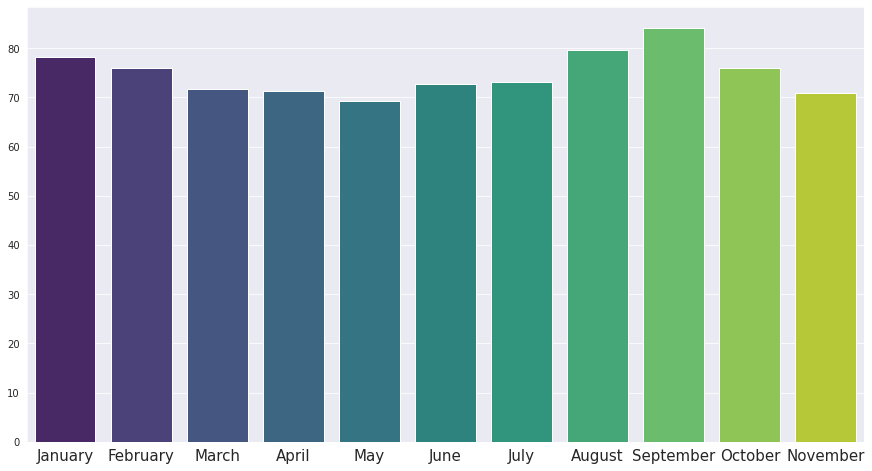

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df_books = pd.read_csv('/home/left/Desktop/dataMining/set1/multiTimeline2018.csv')

df_books['Week'] = pd.to_datetime(df_books['Εβδομάδα'])
df_books['month'] = df_books['Week'].dt.month
df_books = df_books.drop(columns = 'Εβδομάδα')

mean_score = []
mean_books = []

for j in range(1,12):
    for i in range(len(df_books.month)):
        if df_books.month.values[i]==j:
            mean_score.append(df_books.Score.values[i])
    mean_books.append(np.mean(mean_score))
    mean_score = []


months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,8))
g = sns.barplot(data = df_books, x = months, y = mean_books, order = months, palette = 'viridis')
g.set_xticklabels(months, fontsize=15);



In [2]:
mean_books

[78.25, 76.0, 71.75, 71.4, 69.25, 72.75, 73.2, 79.75, 84.2, 76.0, 71.0]

In [4]:
mean_books

[63.25, 60.5, 60.4, 65.0, 61.2, 58.75, 47.5, 49.2, 65.75, 65.25, 86.25]